# Plotting Oceanographic Station Data, modified from Deepa Rao!

In [1]:
import os #need to to move between directories while using jupyter notebook
import glob

In [2]:
# data & math
import math
from math import e
import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
import datetime as dt

# open CNV files for CTD data
from seabird.cnv import fCNV

# seawater property calculations
#import seawater as sw #seawater package: https://pypi.org/project/seawater/, examples: https://pythonhosted.org/seawater/library.html

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colormap

%matplotlib inline
import seaborn as sns
#import cmocean as cmo

# set seaborn style: http://www.jesshamrick.com/2016/04/13/reproducible-plots/
sns.set_context('paper')

# Load Data from CTD + metal quant

In [3]:
# load CTD files from directory
ctd_st1 = fCNV('CTD/BV55C2.cnv')
ctd_st2 = fCNV('CTD/BV55C5.cnv')
ctd_st3 = fCNV('CTD/BV55C7.cnv')
ctd_st5 = fCNV('CTD/BV55C9.cnv')
ctd_st6 = fCNV('CTD/BV55C11.cnv')
ctd_st7 = fCNV('CTD/BV55C16.cnv')
ctd_st8 = fCNV('CTD/BV55C17.cnv')


# read CNV files into DF
ctd_st1 = ctd_st1.as_DataFrame()
ctd_st2 = ctd_st2.as_DataFrame()
ctd_st3 = ctd_st3.as_DataFrame()
ctd_st5 = ctd_st5.as_DataFrame()
ctd_st6 = ctd_st6.as_DataFrame()
ctd_st7 = ctd_st7.as_DataFrame()
ctd_st8 = ctd_st8.as_DataFrame()

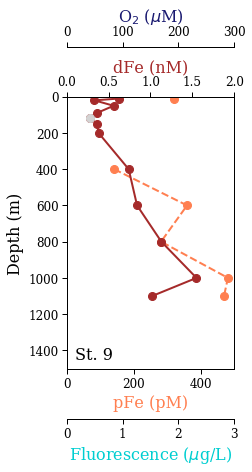

In [316]:
# dissolved Fe, particulate Fe, O2 and CHL
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 16
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
ctd = ctd_st8 #St. 9 has no CTD

y1 = df['depth'] 
y2 = ctd['PRES']
x1 = df['pFe (pM)'] 
x2 = df['Fe (nM)'] 
x3 = ctd['sbeox0Mm/L'] 
x4 = ctd['flC']

#main data colors
x1_color = 'coral' 
x2_color = 'brown'
x3_color = 'midnightblue'
x4_color = 'darkturquoise'

#LOD for dissolved Fe
cond = x2 < 0.3

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='pFe (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=2, markersize=8, data=df, label='dFe (nM)')
fig2, = ax2.plot( x2[cond], y1[cond], 'o', color='#D3D3D3', linewidth=2, markersize=8, data=df, label='dFe (nM)')
fig3, = ax3.plot( x3, y2, 'o--', color=x3_color, linewidth=2, markersize=0, data=ctd, label='O$_{2}$ ($ \mu$M)')
fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=2, markersize=0, data=ctd, label='Fluorescence ($ \mu$g/L)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,500])
ax2.set_xlim([0,2])
ax3.set_xlim([0,300])
ax4.set_xlim([0,3])

#St. 8
#ax1.set_xlim([0,600])
#ax2.set_xlim([0,5])
#ax3.set_xlim([0,300])
#ax4.set_xlim([0,8])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pFe (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dFe (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('O$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
ax4.set_xlabel('Fluorescence ($ \mu$g/L)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
ax4.tick_params(axis='x', colors='black', labelsize=12)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=16)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_FeO2Chl', format='eps', dpi=300, bbox_inches = 'tight')
#plt.show()

In [162]:
# read CNV files into DF
ctd_st7.head()


,c1mS/cm,TEMP,PRES,par,sbeox0Mm/L,flC,CStarTr0,flag,LATITUDE,LONGITUDE
0,58.023980,27.8816,14.602,1.000000e-12,130.771,0.0365,98.9538,0.0,37.5245,-70.480167
1,58.023980,27.8822,14.602,1.000000e-12,130.769,0.0362,98.9538,0.0,37.5245,-70.480167
2,58.024836,27.8823,14.644,1.000000e-12,130.770,0.0359,98.9538,0.0,37.5245,-70.480167
3,58.024115,27.8823,14.626,1.000000e-12,130.769,0.0355,98.9538,0.0,37.5245,-70.480167
4,58.023980,27.8828,14.602,1.000000e-12,130.768,0.0352,98.9538,0.0,37.5245,-70.480167


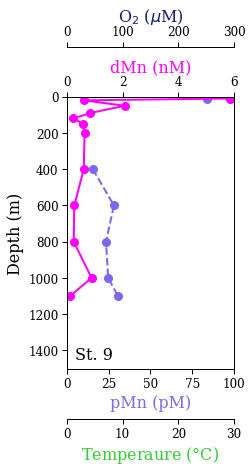

In [329]:
# dissolved Mn, particulate Mn, temp and O2
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 16
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
ctd = ctd_st8 #St. 9 has no CTD

y1 = df['depth'] 
y2 = ctd['PRES']
x1 = df['pMn (pM)'] 
x2 = df['Mn (nM)'] 
x3 = ctd['sbeox0Mm/L'] 
x4 = ctd['TEMP']

#main data colors
x1_color = 'mediumslateblue' 
x2_color = 'magenta' 
x3_color = 'midnightblue'
x4_color = 'limegreen'

#LOD for dissolved Mn
cond = x2 < 0.025

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='pMn (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=2, markersize=8, data=df, label='dMn (nM)')
fig2, = ax2.plot( x2[cond], y1[cond], 'o', color='#D3D3D3', linewidth=2, markersize=8, data=df, label='dFe (nM)')
#fig3, = ax3.plot( x3, y2, 'o--', color=x3_color, linewidth=2, markersize=0, data=ctd, label='O$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=2, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,100])
ax2.set_xlim([0,6])
ax3.set_xlim([0,300])
ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pMn (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dMn (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('O$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
ax4.tick_params(axis='x', colors='black', labelsize=12)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=16)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_MnO2Temp.eps', format='eps', dpi=300, bbox_inches = 'tight')
#plt.show()

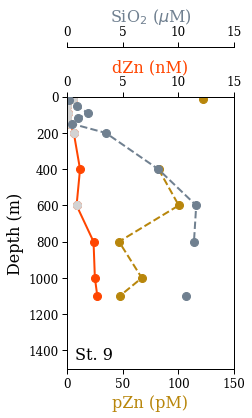

In [359]:
# dissolved Zn, particulate Zn, Si
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 16
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pZn (pM)'] 
x2 = df['Zn (nM)'] 
x3 = df['Si (uM)'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'darkgoldenrod' 
x2_color = 'orangered' 
x3_color = 'slategrey'
#x4_color = 'limegreen'

cond = x2 < 0.95

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='pZn (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=2, markersize=8, data=df, label='dZn (nM)')
fig2, = ax2.plot( x2[cond], y1[cond], 'o', color='#D3D3D3', linewidth=2, markersize=8, data=df, label='dFe (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=2, markersize=8, data=df, label='SiO$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,150])
ax2.set_xlim([0,15])
ax3.set_xlim([0,15])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pZn (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dZn (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('SiO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=16)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_ZnSi.eps', format='eps', dpi=300, bbox_inches = 'tight')
#plt.show()

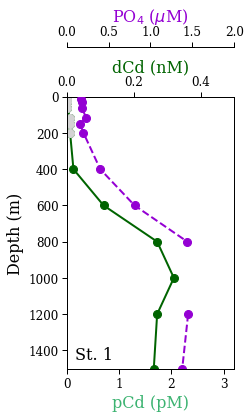

In [367]:
# dissolved Cd, particulate Cd, P
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 16
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn1
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pCd (pM)'] 
x2 = df['Cd (nM)'] 
x3 = df['PO4 (uM)'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'mediumseagreen' 
x2_color = 'darkgreen' 
x3_color = 'darkviolet'
#x4_color = 'limegreen'

cond = x2 < 0.02

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='pCd (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=2, markersize=8, data=df, label='dCd (nM)')
fig2, = ax2.plot( x2[cond], y1[cond], 'o', color='#D3D3D3', linewidth=2, markersize=8, data=df, label='dFe (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=2, markersize=8, data=df, label='PO$_{4}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,3.2])
ax2.set_xlim([0,0.5])
ax3.set_xlim([0,2])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pCd (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dCd (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('PO$_{4}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 1',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=16)

#plt.tight_layout()
#plt.draw()
plt.savefig('St1_CdP.eps', format='eps', dpi=300, bbox_inches = 'tight')
#plt.show()

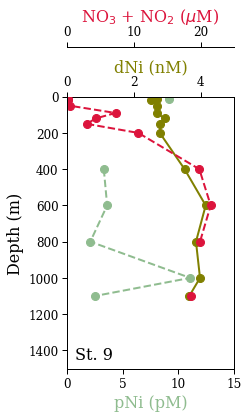

In [379]:
# dissolved Ni, particulate Ni, NO3
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 16
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pNi (pM)'] 
x2 = df['Ni (nM)'] 
x3 = df['NO2+NO3 (uM)'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'darkseagreen' 
x2_color = 'olive' 
x3_color = 'crimson'
#x4_color = 'limegreen'

cond = x2 < 0.07

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='pNi (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=2, markersize=8, data=df, label='dNi (nM)')
fig2, = ax2.plot( x2[cond], y1[cond], 'o', color='#D3D3D3', linewidth=2, markersize=8, data=df, label='dFe (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=2, markersize=8, data=df, label='NO$_{3}$ + NO$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,15])
ax2.set_xlim([0,5])
ax3.set_xlim([0,25])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pNi (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dNi (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('NO$_{3}$ + NO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=16)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_NiNO3.eps', format='eps', dpi=300, bbox_inches = 'tight')
#plt.show()

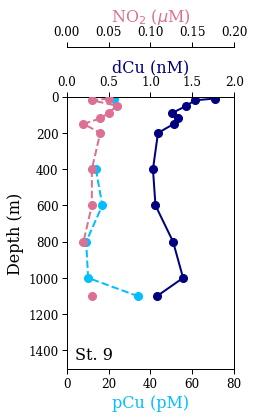

In [388]:
# dissolved Cu, particulate Cu, NO2
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 16
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pCu (pM)'] 
x2 = df['Cu (nM)'] 
x3 = df['NO2 (uM)'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'deepskyblue' 
x2_color = 'navy' 
x3_color = 'palevioletred'
#x4_color = 'limegreen'

cond = x2 < 0.12

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='pCu (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=2, markersize=8, data=df, label='dCu (nM)')
fig2, = ax2.plot( x2[cond], y1[cond], 'o', color='#D3D3D3', linewidth=2, markersize=8, data=df, label='dFe (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=2, markersize=8, data=df, label='NO$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,80])
ax2.set_xlim([0,2])
ax3.set_xlim([0,0.2])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pCu (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dCu (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('NO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=16)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_CuNO2.eps', format='eps', dpi=300, bbox_inches = 'tight')
#plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
odv = pd.read_csv('metals_ODV.csv')
plt.rcParams["font.family"] = "serif"
odv.head()

,Latitude,Longitude,Station,depth,Fe,Zn,Cd,Ni,Cu,Mn,...,NO2+NO3,Si,NO2,NH4,pMn,pFe,pNi,pCu,pZn,pCd
0,31.666888,-64.166293,1,10,0.535234,1.013424,0.001253,2.004302,0.854536,2.395847,...,0.3,0.1,0.04,0.19,NaN,NaN,NaN,NaN,NaN,NaN
1,31.666888,-64.166293,1,30,0.531819,0.671165,0.003520,1.958119,0.888045,2.544319,...,0.2,0.3,0.02,0.09,NaN,NaN,NaN,NaN,NaN,NaN
2,31.666888,-64.166293,1,60,0.736866,0.748252,0.003182,1.972479,0.996230,2.158336,...,0.1,0.1,0.03,0.15,NaN,NaN,NaN,NaN,NaN,NaN
3,31.666888,-64.166293,1,115,0.185665,0.971132,0.007250,2.003143,0.908902,1.298053,...,1.4,0.4,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,31.666888,-64.166293,1,150,0.237065,1.444574,0.006938,2.008332,0.928732,1.185590,...,1.0,0.1,0.03,0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d = np.polyfit(odv['PO4 (uM)'],odv['Cd (nM)'],1)
f = np.poly1d(d)
odv.insert(5,'Cd:P slope',f(odv['PO4']))

In [ ]:
ax=odv.plot.scatter(x='PO4', y='Cd', color='black')
odv.plot(x='PO4',y='Cd:P slope',color='Red',legend=False,ax=ax, xlabel=('NO$_{2}$ ($ \mu$M)'))

# Salinity correlations

In [141]:
ctd = pd.read_csv('Salinity_metals.csv')
# Salinity from BATS CTD - no data for St. 9

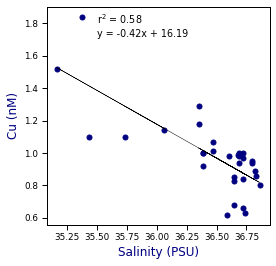

In [135]:
#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = ctd['Cu (nM)'] 
x = ctd['Salinity (PSU)']

#Change look of plot
x1_color = 'navy' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=ctd)


#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Salinity (PSU)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('Cu (nM)', color=x1_color, fontsize=font_size)


import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b, '-', color='black', linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(35.5,1.8))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(35.5,1.72))
fig.savefig('scatter_Cu.eps', format='eps', bbox_inches = "tight")

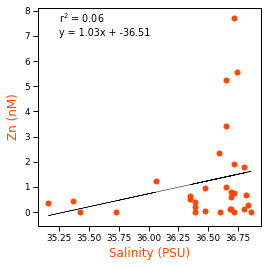

In [142]:
#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = ctd['Zn (nM)'] 
x = ctd['Salinity (PSU)']

#Change look of plot
x1_color = 'orangered' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=ctd)


#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Salinity (PSU)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('Zn (nM)', color=x1_color, fontsize=font_size)


import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b, color='black',linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(35.25,7.5))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(35.25,7))
fig.savefig('scatter_Zn.eps', format='eps', bbox_inches = "tight")

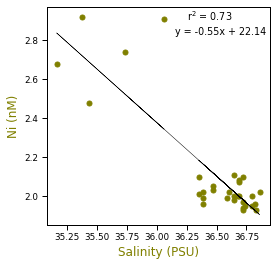

In [143]:
#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = ctd['Ni (nM)'] 
x = ctd['Salinity (PSU)']

#Change look of plot
x1_color = 'olive' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=ctd)


#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Salinity (PSU)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('Ni (nM)', color=x1_color, fontsize=font_size)


import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b,color='black',linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(36.25,2.9))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(36.15,2.83))
fig.savefig('scatter_Ni.eps', format='eps', bbox_inches = "tight")

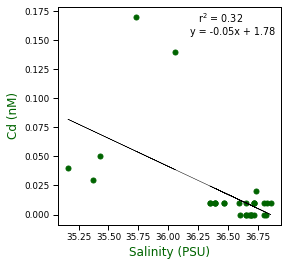

In [144]:
#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = ctd['Cd (nM)'] 
x = ctd['Salinity (PSU)']

#Change look of plot
x1_color = 'darkgreen' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=ctd)


#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Salinity (PSU)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('Cd (nM)', color=x1_color, fontsize=font_size)


import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b,color='black',linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(36.25,0.165))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(36.18,0.155))
fig.savefig('scatter_Cd.eps', format='eps', bbox_inches = "tight")

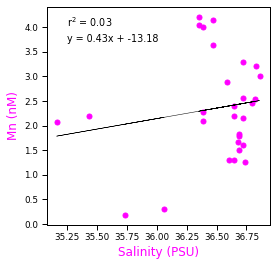

In [145]:
#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

# ! WARNING = removes 2 rows with "NA" for Mn concentrations
ctd = ctd.drop(ctd.index[6], axis=0)
ctd = ctd.drop(ctd.index[25], axis=0)

y = ctd['Mn (nM)'] 
x = ctd['Salinity (PSU)']

#Change look of plot
x1_color = 'magenta' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=ctd)


#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Salinity (PSU)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('Mn (nM)', color=x1_color, fontsize=font_size)

import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b,color='black',linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(35.25,4))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(35.25,3.7))
fig.savefig('scatter_Mn.eps', format='eps', bbox_inches = "tight")

# Pigment, protein, transcript concentration correlations

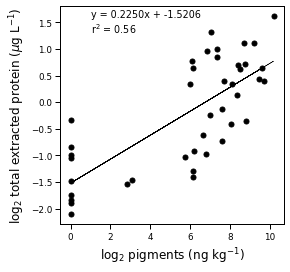

In [26]:
data = pd.read_csv('pigments_trans_prot.csv')

#Proteins vs pigments
subset = data[["Proteins(ug/L)", "Pigments(ng/kg)"]]
fix = subset.dropna()

#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = np.log2(fix['Proteins(ug/L)'])
x = np.log2(fix['Pigments(ng/kg)']+1)

#Change look of plot
x1_color = 'black' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=fix)

#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('log$_{2}$ pigments (ng kg$^{-1}$)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('log$_{2}$ total extracted protein ($\mu$g L$^{-1}$)', color=x1_color, fontsize=font_size)

import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b, '-', color='black', linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(1,1.3))
ax1.annotate('y = ' + str("{:.4f}".format(m)) + 'x + ' + str("{:.4f}".format(b)), xy=(1,1.6))
fig.savefig('prot_pigment.eps', format='eps', bbox_inches = "tight")

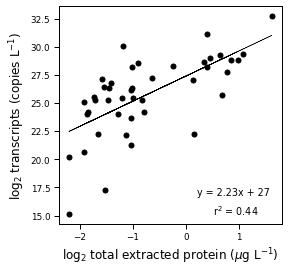

In [29]:
#Proteins vs transcripts
data = pd.read_csv('pigments_trans_prot.csv')
data = data[data['ID'] != '7_500']
subset = data[["Proteins(ug/L)", "Factor"]]
fix = subset.dropna()

#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = np.log2(fix['Factor'])
x = np.log2(fix['Proteins(ug/L)'])

#Change look of plot
x1_color = 'black' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=fix)

#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('log$_{2}$ total extracted protein ($\mu$g L$^{-1}$)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('log$_{2}$ transcripts (copies L$^{-1}$)', color=x1_color, fontsize=font_size)

import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b, '-', color='black', linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(0.5,15))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.0f}".format(b)), xy=(0.2,16.8))
fig.savefig('prot_trans.eps', format='eps', bbox_inches = "tight")

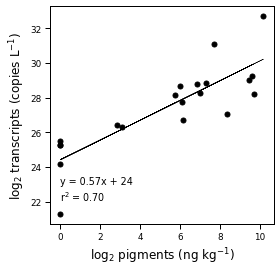

In [34]:
#Transcripts vs pigments
data = pd.read_csv('pigments_trans_prot.csv')
subset = data[["Pigments(ng/kg)", "Factor"]]
fix = subset.dropna()

#Add axis labels, connect the dots, invert the plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

y = np.log2(fix['Factor'])
x = np.log2(fix['Pigments(ng/kg)']+1)

#Change look of plot
x1_color = 'black' 
font_size = 12

# plot
fig1 = ax1.plot(x, y, 'o', color=x1_color, linewidth=2, markersize=5, data=fix)

#axes labels
#ax1.set_xlabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('log$_{2}$ pigments (ng kg$^{-1}$)', color=x1_color, fontsize=font_size)
ax1.set_ylabel('log$_{2}$ transcripts (copies L$^{-1}$)', color=x1_color, fontsize=font_size)

import scipy.stats
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax1.plot(x, m*x+b, '-', color='black', linewidth=0.5)
ax1.annotate('r$^2$ = ' + str("{:.2f}".format(r_value**2)), xy=(0,22))
ax1.annotate('y = ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.0f}".format(b)), xy=(0,23))
fig.savefig('trans_pigment.eps', format='eps', bbox_inches = "tight")

# Fungi vs beam transmission

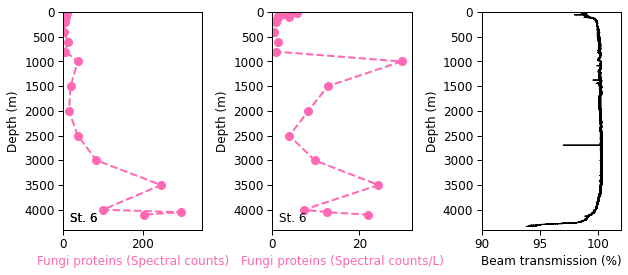

In [34]:
ctd = ctd_st6
df = pd.read_csv('fungiprofilecountsL.csv')
df2 = pd.read_csv('fungiprofile.csv')

fig = plt.figure(figsize=(10,4))
font_size = 12
ax1 = fig.add_subplot(131) 

y1 = df2['Depth'] 
x1 = df2[' Fungi (Spectral counts)'] 

#main data colors
x1_color = 'hotpink' 
# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='Fungi proteins (spectral counts/L)')
#alter y axis
ax1.set_ylim([0,4400])
ax1.invert_yaxis()
#alter y axis
ax1.set_xlim([0,350])
#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Fungi proteins (Spectral counts)', color=x1_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')
ax1.text(0.05, 0.02, 'St. 6',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=12)

#plt.savefig('Fungi_transmissometer.eps', format='eps', dpi=300, bbox_inches = 'tight')

#Spectral counts/L)
font_size = 12
ax2 = fig.add_subplot(132) 

y1 = df['Depth'] 
x1 = df[' Fungi (Spectral counts/L)'] 

#main data colors
x1_color = 'hotpink' 
# plot
fig1, = ax2.plot( x1, y1, 'o--', color=x1_color, linewidth=2, markersize=8, data=df, label='Fungi proteins (spectral counts/L)')
#alter y axis
ax2.set_ylim([0,4400])
ax2.invert_yaxis()
#alter y axis
ax2.set_xlim([0,32])
#axes labels
ax2.set_ylabel('Depth (m)', fontsize=font_size)
ax2.set_xlabel('Fungi proteins (Spectral counts/L)', color=x1_color, fontsize=font_size)

#axis location and details
ax2.spines['bottom'].set_position(('outward', 0))
ax2.tick_params(axis='y', colors='black', labelsize=12)
ax2.tick_params(axis='x', colors='black', labelsize=12)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.text(0.05, 0.02, 'St. 6',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=12)

#Beam
font_size = 12
ax3 = fig.add_subplot(133) 

y1 = ctd['DEPTH'] 
x1 = ctd['CStarTr0'] 

#main data colors
x1_color = 'black' 
# plot
fig1 = ax3.plot( x1, y1, '-', color=x1_color, linewidth=1, markersize=8, data=ctd, label='Beam transmission (%)')
#alter y axis
ax3.set_ylim([0,4400])
ax3.invert_yaxis()
#alter y axis
ax3.set_xlim([90,102])
#axes labels
ax3.set_ylabel('Depth (m)', fontsize=font_size)
ax3.set_xlabel('Beam transmission (%)', color=x1_color, fontsize=font_size)

#axis location and details
ax3.spines['bottom'].set_position(('outward', 0))
ax3.tick_params(axis='y', colors='black', labelsize=12)
ax3.tick_params(axis='x', colors='black', labelsize=12)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.text(0.05, 0.02, 'St. 6',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax2.transAxes,
        color='black', fontsize=12)

#plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.savefig('Fungi_transmissometer.eps', format='eps', dpi=300, bbox_inches = 'tight')



In [6]:
df.head()

,ID,Depth,Fungi (Spectral counts/L)
0,6_20,20,5.710345
1,6_40,40,3.112392
2,6_70,70,1.380000
3,6_110,110,3.839373
4,6_150,150,1.057269
